In [55]:
conda install -c conda-forge matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/richard_fernandes/anaconda3/envs/landsatModis

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h7f98852_5          17 KB  conda-forge
    brotli-bin-1.0.9           |       h7f98852_5          19 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    dbus-1.13.6                |       he372182_0         602 KB  conda-forge
    expat-2.2.10               |       h9c3ff4c_0         164 KB  conda-forge
    freetype-2.11.0            |       h70c0345_0         618 KB
    glib-2.69.1                |       h4ff587b_1 

In [81]:
import numpy as np
import pandas as pd
import pickle
import matplotlib

In [126]:
file_name = ['LUTinputLC0XB36cal', 'LUTinputLC0XB45cal','LUTinputMOD09cal' ,'LUTinputLC0XLatcal', \
             'LUTinputLC0XLoncal','LUToutputLC0Xcal','YearLC0Xcal','MonthLC0Xcal', \
             'DayLC0Xcal','RowLC0Xcal','RowLC0Xcal']

dataset = []
DataList = []
count = 0

for name in file_name:
    dataset.append(f'/home/richard_fernandes/{name}')

for name_dataset in dataset:
    with open(f'{name_dataset}', 'rb') as fp1:
        objs = []
        while 1:
            try:
                objs.append(pickle.load(fp1))
            except EOFError:
                break
        DataList = [item for sublist in objs for item in sublist]
        
    if count == 0:
        LUTB36_list = DataList
    elif count == 1:
        LUTB45_list = DataList
    elif count == 2:
        LUTMOD09_list = DataList
    elif count == 3:
        LUTLat = DataList
    elif count == 4:
        LUTLon = DataList
    elif count == 5:
        LUToutput_list = DataList
    elif count == 6:
        LUTyear = DataList
    elif count == 7:
        LUTmonth = DataList
    elif count == 8:
        LUTday = DataList
    elif count == 9:
        LUTpath = DataList
    elif count == 10:
        LUTrow = DataList
    
    count = count + 1
        
print(len(LUTB36_list))
print(len(LUTB45_list))
print(len(LUTMOD09_list))
print(len(LUTLat))
print(len(LUTLon))
print(len(LUToutput_list))
print(len(LUTyear))
print(len(LUTmonth))
print(len(LUTday))
print(len(LUTpath))
print(len(LUTrow))


1530265
1530265
1530265
1530265
1530265
1530265
1530265
1530265
1530265
1530265
1530265


In [128]:
# parse the LUTs into Pandas tables
LUT_Lai = np.uint64(np.floor(np.mod(LUToutput_list,1e2)/1e0))
LUT_LaiStdDev = np.uint64(np.floor(np.floor(np.mod(LUToutput_list,1e4)/1e2)))
LUT_Fpar = np.uint64(np.floor(np.mod(LUToutput_list,1e6))/1e4)
LUT_FparStdDev = np.uint64(np.floor(np.floor(np.mod(LUToutput_list,1e8)/1e6)))
LUT_satFlag = np.uint64(np.floor(np.mod(LUToutput_list,1e11))/1e8)
LUT_snowFlag = np.uint64(np.floor(np.floor(np.mod(LUToutput_list,1e14)/1e11)))
LUT_LC_Type3 = np.uint64(np.floor(np.floor(np.mod(LUToutput_list,1e16)/1e14)))



LUT_SR_B3 = np.uint64(np.floor(np.floor(np.mod(LUTB36_list,1e3)/1)))
LUT_SR_B4 = np.uint64(np.floor(np.floor(np.mod(LUTB45_list,1e3)/1)))

LUT_SR_B5 = np.uint64(np.floor(np.floor(np.mod(LUTB45_list,1e6)/1e3)))
LUT_SR_B6 = np.uint64(np.floor(np.floor(np.mod(LUTB36_list,1e6)/1e3)))
LUT_VIEW_ZENITH = np.uint64(np.floor(np.floor(np.mod(LUTB45_list,1e8)/1e6)))
LUT_VIEW_AZIMUTH = np.uint64(np.floor(np.floor(np.mod(LUTB45_list,1e11)/1e8)))
LUT_SUN_ELEVATION = np.uint64(np.floor(np.floor(np.mod(LUTB45_list,1e13)/1e11)))
LUT_SUN_AZIMUTH = np.uint64(np.floor(np.floor(np.mod(LUTB45_list,1e16)/1e13)))

LUT_MOD09_RED = np.uint64(np.floor(np.floor(np.mod(LUTMOD09_list,1e4)/1)))
LUT_MOD09_NIR = np.uint64(np.floor(np.floor(np.mod(LUTMOD09_list,1e8)/14)))



In [129]:
unsatDF =  pd.DataFrame( {'year':LUTyear, 'month': LUTmonth, 'day': LUTday, 'path':LUTpath, 'row':LUTrow,\
                          'Lat':LUTLat, 'Lon':LUTLon, 'input36': LUTB36_list,'input45':LUTB45_list, 'inputMOD09': LUTMOD09_list , 'redMODIS': LUT_MOD09_RED,'NIRMODIS': LUT_MOD09_NIR,\
                          'green':LUT_SR_B3, 'red':LUT_SR_B4, 'NIR': LUT_SR_B5, 'SWIR1':LUT_SR_B6,   \
                          'SensorZenith':LUT_VIEW_ZENITH, 'SensorAzimuth': LUT_VIEW_AZIMUTH, 'SolarZenith':LUT_SUN_ELEVATION, 'SolarAzimuth': LUT_SUN_AZIMUTH, \
                          'LC_type3': LUT_LC_Type3, 'output': LUToutput_list,'LAI': LUT_Lai, 'stdLAI': LUT_LaiStdDev, 'FAPAR': LUT_Fpar, 'stdFAPAR': LUT_FparStdDev,\
                          'LUT_satFlag': LUT_satFlag,'LUT_snowFlag': LUT_snowFlag,'LC_type3': LUT_LC_Type3}, index=LUTB36_list) \
                .astype(int) \
                .sort_values('input36')

In [133]:
unsatDF['MODISSR'] = unsatDF['NIRMODIS'].divide(unsatDF['redMODIS'])

<AxesSubplot:xlabel='MODISSR', ylabel='LAI'>

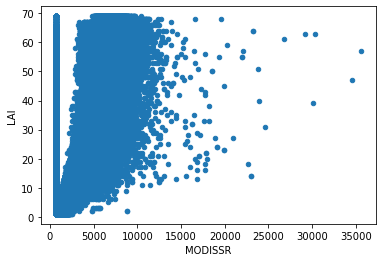

In [134]:
unsatDF.plot.scatter('MODISSR','LAI')